# ThermoML

In [1]:
import thermopyl
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
%load_ext kedro.extras.extensions.ipython
%reload_kedro

2022-03-22 21:02:22,524 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-03-22 21:02:22,629 - root - INFO - ** Kedro project DL4Thermo
2022-03-22 21:02:22,629 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-03-22 21:02:22,766 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-03-22 21:02:22,815 - root - INFO - ** Kedro project DL4Thermo
2022-03-22 21:02:22,816 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [32]:
df = catalog.load("imported_thermoml")

2022-03-22 21:10:18,079 - kedro.io.data_catalog - INFO - Loading data from `imported_thermoml` (ParquetDataSet)...


In [35]:
df["filename"].str.split("/", expand=True)[10].value_counts()

10.1016    1336335
10.1021    1266158
10.1007      40932
Name: 10, dtype: int64

## Which properties have data?

In [58]:
l = df.shape[0]
fills = [[col, df[col].count() / l] for col in df.columns]

Text(0.5, 0, 'Fraction filled')

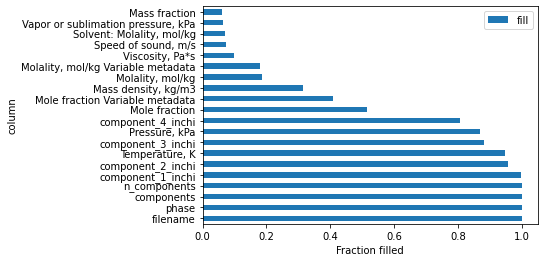

In [59]:
fill_df = pd.DataFrame(fills, columns=["column", "fill"]).set_index("column")
fig, ax  = plt.subplots(1)
fill_df.sort_values("fill", ascending=False).head(20).plot.barh(ax=ax)
ax.set_xlabel("Fraction filled")

## Check number of binary and ternary mixtures

In [54]:
df["n_components"] = df["components"].str.split("__").apply(len)

In [55]:
df["n_components"].value_counts()

2    1360576
3     736006
1     546843
Name: n_components, dtype: int64

In [106]:
cols = [
    "Mole fraction",
    "Mole fraction Variable metadata",
    "phase",
    'filename',
    "components",
    "n_components",
    'Pressure, kPa',
    'Temperature, K'
]
cols += [f"component_{i}_inchi" for i in range(1,5)]
df_vle = df[cols]

In [119]:
fraction_cols = [col for col in df.columns if "fraction" in col]

In [125]:
[col for col in df.columns if "liquid" in col]

['Surface tension liquid-gas, N/m',
 'Surface tension liquid-gas, N/m_std',
 'Solid-liquid equilibrium temperature, K',
 'Solid-liquid equilibrium temperature, K_std',
 'Liquid-liquid equilibrium temperature, K',
 'Liquid-liquid equilibrium temperature, K_std']

In [121]:
example = df[df["filename"].str.contains("10.1016/j.fluid.2016.01.028")]
example[~example["Mole fraction"].isna()][fraction_cols].dropna(axis=1)

,Mole fraction Variable metadata,Mole fraction
15,"1,1,1,2-tetrafluoroethane___",0.2675
16,"1,1,1,2-tetrafluoroethane___",0.6507
17,"1,1,1,2-tetrafluoroethane___",0.2770
18,"1,1,1,2-tetrafluoroethane___",0.3611
19,"1,1,1,2-tetrafluoroethane___",0.3970
20,"1,1,1,2-tetrafluoroethane___",0.4994
21,"1,1,1,2-tetrafluoroethane___",0.4410
22,"1,1,1,2-tetrafluoroethane___",0.4651
23,"1,1,1,2-tetrafluoroethane___",0.6336
24,"1,1,1,2-tetrafluoroethane___",0.6403


In [101]:
binary_subset = df_vle[
    (~df_vle["component_1_inchi"].isna()) & 
    (~df_vle["component_2_inchi"].isna()) &
    (df_vle["component_3_inchi"].isna()) &
    (df_vle["component_4_inchi"].isna()) 
]

binary_subset = binary_subset.drop(["component_3_inchi", "component_4_inchi"], axis=1).dropna()
binary_subset

,Mole fraction,Mole fraction Variable metadata,phase,filename,components,n_components,component_1_inchi,component_2_inchi
0,0.2958,nitrous oxide___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,difluoromethane__nitrous oxide,2,InChI=1S/CH2F2/c2-1-3/h1H2,InChI=1S/N2O/c1-2-3
1,0.3826,nitrous oxide___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,difluoromethane__nitrous oxide,2,InChI=1S/CH2F2/c2-1-3/h1H2,InChI=1S/N2O/c1-2-3
2,0.2958,nitrous oxide___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,difluoromethane__nitrous oxide,2,InChI=1S/CH2F2/c2-1-3/h1H2,InChI=1S/N2O/c1-2-3
3,0.3826,nitrous oxide___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,difluoromethane__nitrous oxide,2,InChI=1S/CH2F2/c2-1-3/h1H2,InChI=1S/N2O/c1-2-3
4,0.7326,nitrous oxide___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,difluoromethane__nitrous oxide,2,InChI=1S/CH2F2/c2-1-3/h1H2,InChI=1S/N2O/c1-2-3
...,...,...,...,...,...,...,...,...
13,0.7143,sodium hydrogen fluoride___,Liquid,/Users/Kobi/Documents/Research/phd_code/dl4the...,sodium hydrogen fluoride__aluminum fluoride,2,InChI=1S/2FH.Na/h2*1H;/q;;+1/p-1,InChI=1S/Al.3FH/h;3*1H/q+3;;;/p-3
14,0.7500,sodium hydrogen fluoride___,Liquid,/Users/Kobi/Documents/Research/phd_code/dl4the...,sodium hydrogen fluoride__aluminum fluoride,2,InChI=1S/2FH.Na/h2*1H;/q;;+1/p-1,InChI=1S/Al.3FH/h;3*1H/q+3;;;/p-3
15,0.7500,sodium hydrogen fluoride___,Liquid,/Users/Kobi/Documents/Research/phd_code/dl4the...,sodium hydrogen fluoride__aluminum fluoride,2,InChI=1S/2FH.Na/h2*1H;/q;;+1/p-1,InChI=1S/Al.3FH/h;3*1H/q+3;;;/p-3
16,0.7500,sodium hydrogen fluoride___,Liquid,/Users/Kobi/Documents/Research/phd_code/dl4the...,sodium hydrogen fluoride__aluminum fluoride,2,InChI=1S/2FH.Na/h2*1H;/q;;+1/p-1,InChI=1S/Al.3FH/h;3*1H/q+3;;;/p-3


In [102]:
binary_subset["phase"].value_counts()

Liquid                                         33446
Gas                                            10185
Fluid (supercritical or subcritical phases)     3686
Liquid mixture 1                                 666
Crystal                                          268
Glass                                             23
Liquid mixture 2                                   8
Crystal of intercomponent compound 1               1
Name: phase, dtype: int64

In [80]:
lg =  set(["Gas", "Liquid"])
lig =  set(["Ideal gas", "Liquid"])
binary_vle_mixtures = [
    mixture for _, mixture in binary_subset.groupby("components")
    if (lg.issubset(set(mixture["phase"].unique().tolist()))) or 
    (lig.issubset(set(mixture["phase"].unique().tolist())))
]
len(binary_vle_mixtures)

2

In [89]:
l =  set(["Liquid"])
binary_liquid_mixtures = [
    mixture for _, mixture in binary_subset.groupby("components")
    if l.issubset(set(mixture["phase"].unique()))
]
len(binary_liquid_mixtures)

314

In [92]:
ternary_subset = df_vle[
    (~df_vle["component_1_inchi"].isna()) & 
    (~df_vle["component_2_inchi"].isna()) &
    (~df_vle["component_3_inchi"].isna()) &
    (df_vle["component_4_inchi"].isna()) 
]

ternary_subset = ternary_subset.drop(["component_4_inchi"], axis=1).dropna()
ternary_subset

,Mole fraction,Mole fraction Variable metadata,phase,filename,components,n_components,"Pressure, kPa","Temperature, K",component_1_inchi,component_2_inchi,component_3_inchi
77,0.2493,methane___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,methane__carbon dioxide,2,724.0,300.0,InChI=1S/CO2/c2-1-3,InChI=1S/CH4/h1H4,InChI=1S/CO2/c2-1-3
78,0.2493,methane___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,methane__carbon dioxide,2,1288.0,300.0,InChI=1S/CO2/c2-1-3,InChI=1S/CH4/h1H4,InChI=1S/CO2/c2-1-3
79,0.2493,methane___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,methane__carbon dioxide,2,1835.0,300.0,InChI=1S/CO2/c2-1-3,InChI=1S/CH4/h1H4,InChI=1S/CO2/c2-1-3
80,0.2493,methane___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,methane__carbon dioxide,2,2335.0,300.0,InChI=1S/CO2/c2-1-3,InChI=1S/CH4/h1H4,InChI=1S/CO2/c2-1-3
81,0.2493,methane___,Gas,/Users/Kobi/Documents/Research/phd_code/dl4the...,methane__carbon dioxide,2,2820.0,300.0,InChI=1S/CO2/c2-1-3,InChI=1S/CH4/h1H4,InChI=1S/CO2/c2-1-3
...,...,...,...,...,...,...,...,...,...,...,...
3,0.1833,toluene___,Liquid mixture 2,/Users/Kobi/Documents/Research/phd_code/dl4the...,toluene__heptane__1-butylpyridinium tetrafluor...,3,101.0,313.2,"InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3","InChI=1S/C7H16/c1-3-5-7-6-4-2/h3-7H2,1-2H3",InChI=1S/C9H14N.BF4/c1-2-3-7-10-8-5-4-6-9-10;2...
4,0.2461,toluene___,Liquid mixture 2,/Users/Kobi/Documents/Research/phd_code/dl4the...,toluene__heptane__1-butylpyridinium tetrafluor...,3,101.0,313.2,"InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3","InChI=1S/C7H16/c1-3-5-7-6-4-2/h3-7H2,1-2H3",InChI=1S/C9H14N.BF4/c1-2-3-7-10-8-5-4-6-9-10;2...
5,0.2894,toluene___,Liquid mixture 2,/Users/Kobi/Documents/Research/phd_code/dl4the...,toluene__heptane__1-butylpyridinium tetrafluor...,3,101.0,313.2,"InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3","InChI=1S/C7H16/c1-3-5-7-6-4-2/h3-7H2,1-2H3",InChI=1S/C9H14N.BF4/c1-2-3-7-10-8-5-4-6-9-10;2...
6,0.3054,toluene___,Liquid mixture 2,/Users/Kobi/Documents/Research/phd_code/dl4the...,toluene__heptane__1-butylpyridinium tetrafluor...,3,101.0,313.2,"InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3","InChI=1S/C7H16/c1-3-5-7-6-4-2/h3-7H2,1-2H3",InChI=1S/C9H14N.BF4/c1-2-3-7-10-8-5-4-6-9-10;2...


In [93]:
lg =  set(["Gas", "Liquid"])
ternary_vle_mixtures = [
    mixture for _, mixture in ternary_subset.groupby("components")
    if lg.issubset(set(mixture["phase"].unique().tolist()))
]
len(ternary_vle_mixtures)

1

In [94]:
l =  set(["Liquid"])
ternary_liquid_mixtures = [
    mixture for _, mixture in ternary_subset.groupby("components")
    if l.issubset(set(mixture["phase"].unique()))
]
len(ternary_liquid_mixtures)

174

NameError: name 'n_binary' is not defined

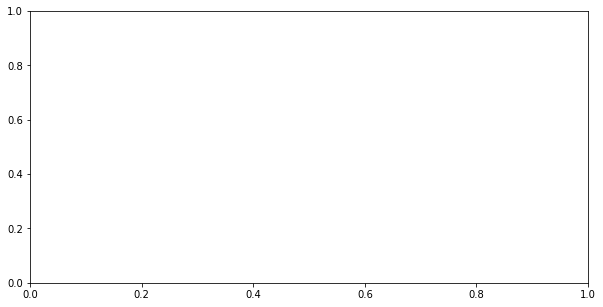

In [11]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.bar([0, 1], [n_binary, n_ternary])
fontdict={"fontsize": 14}
ax.set_xticks([0,1], labels=["Binary", "Ternary"], fontsize=14)
ax.tick_params(direction="in")
fig.savefig("mixtures.png", dpi=300)